<a href="https://colab.research.google.com/github/berthine/AutoEncoder/blob/master/Berthine_Auto_Encoder_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Berthine Nyunga_Autoencoder_Tutorial

In [0]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [0]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [3]:
bs = 1000 #batch_size

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae = AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0443
epoch [2/10], loss:0.0322
epoch [3/10], loss:0.0273
epoch [4/10], loss:0.0248
epoch [5/10], loss:0.0230
epoch [6/10], loss:0.0219
epoch [7/10], loss:0.0211
epoch [8/10], loss:0.0195
epoch [9/10], loss:0.0197
epoch [10/10], loss:0.0191


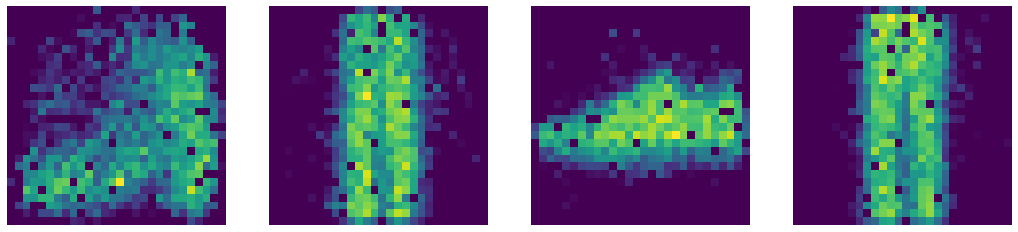

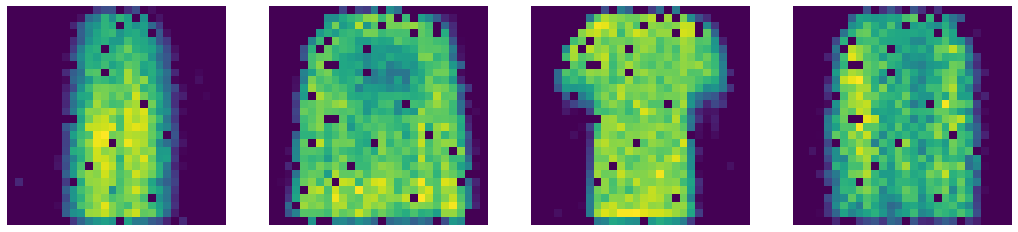

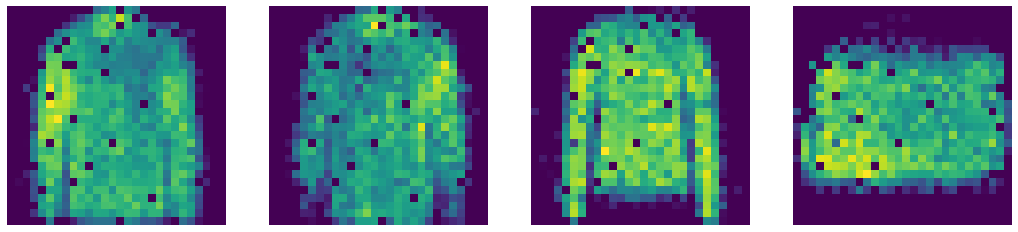

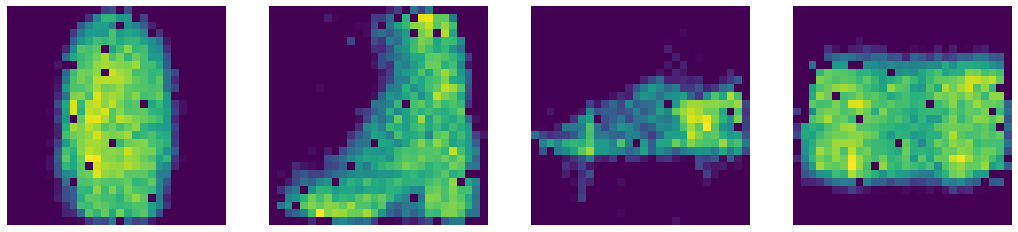

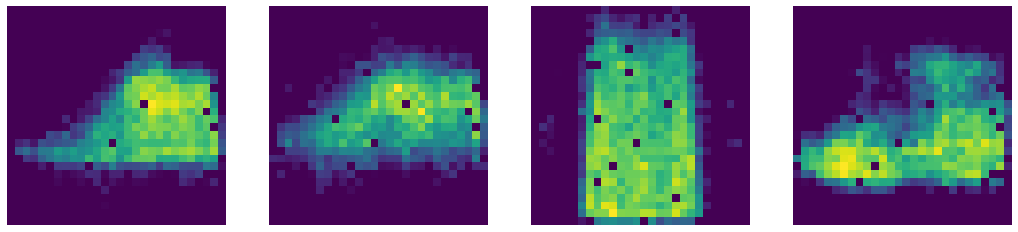

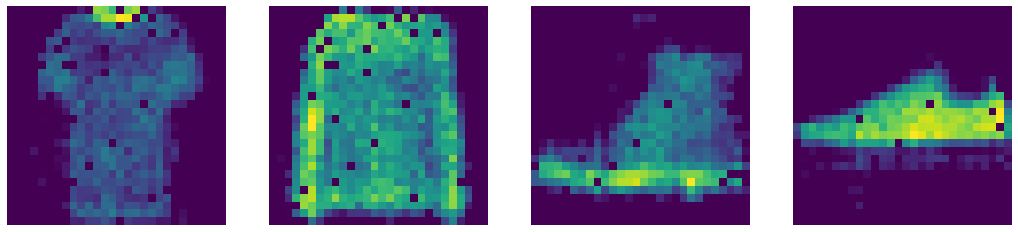

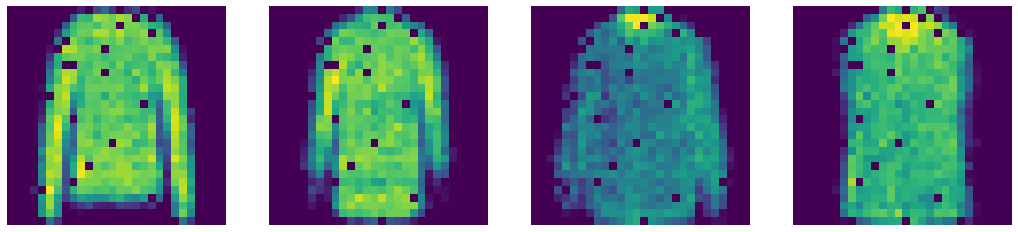

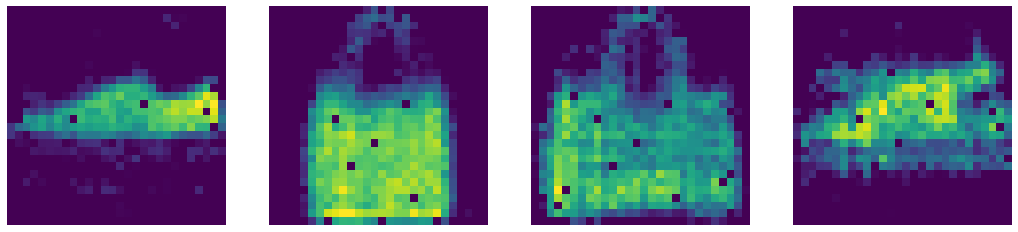

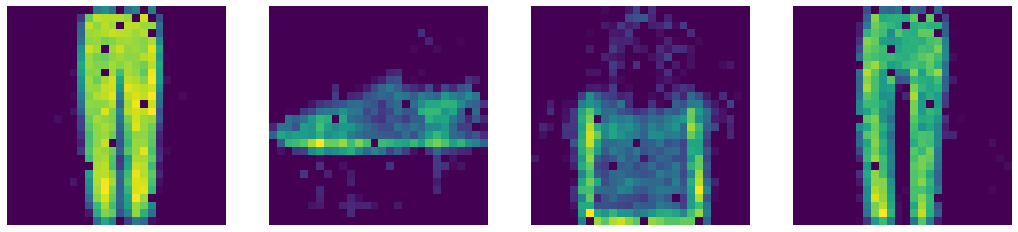

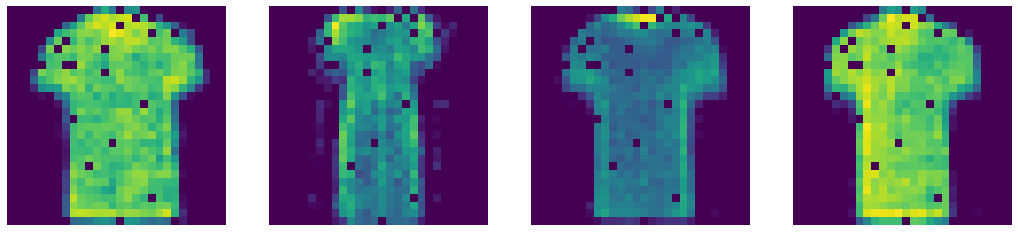

In [13]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

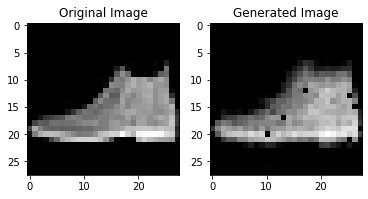

In [15]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

## Exercise 1:  Using the CNN

In [0]:
class CNN_AutoEncoder(nn.Module):
    def __init__(self):
        super(CNN_AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3 ),
                                    nn.LeakyReLU(),
                                    
                                    nn.Conv2d(16, 8, kernel_size=3),
                                    nn.LeakyReLU())
       
        self.decoder = nn.Sequential(nn.ConvTranspose2d(8, 16,  kernel_size = 3),
                                     nn.LeakyReLU(),
                                     nn.ConvTranspose2d(16, 1, kernel_size= 3),
                                     nn.LeakyReLU())
                                     
    
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_1 = CNN_AutoEncoder()

In [18]:
model_1

CNN_AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
  )
)

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_1.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0158
epoch [2/10], loss:0.0087
epoch [3/10], loss:0.0068
epoch [4/10], loss:0.0059
epoch [5/10], loss:0.0050
epoch [6/10], loss:0.0044
epoch [7/10], loss:0.0043
epoch [8/10], loss:0.0027
epoch [9/10], loss:0.0022
epoch [10/10], loss:0.0018


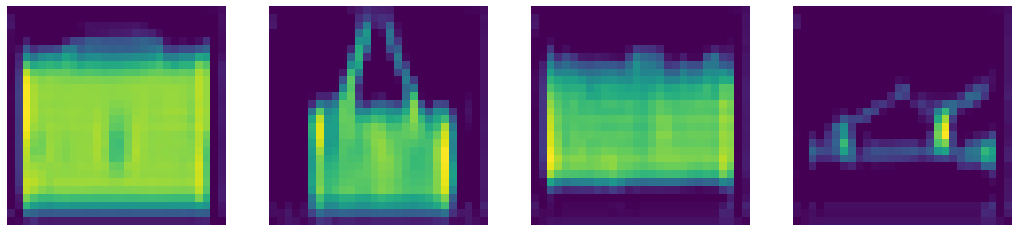

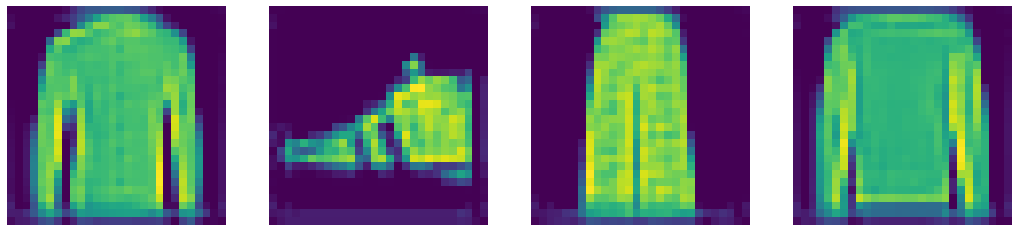

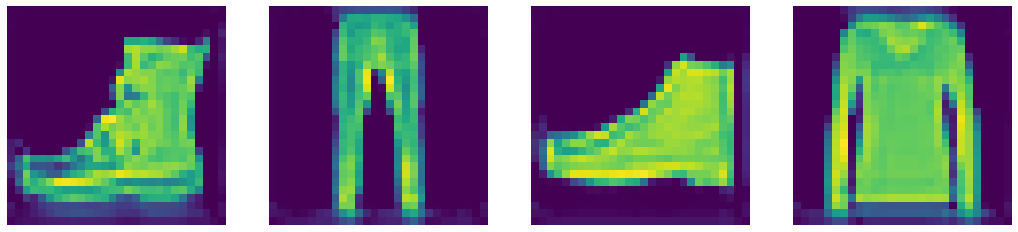

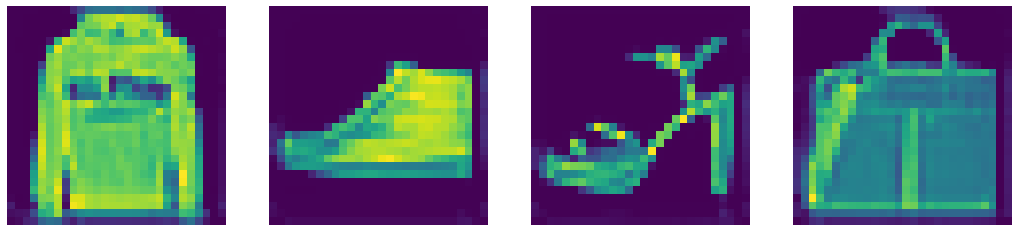

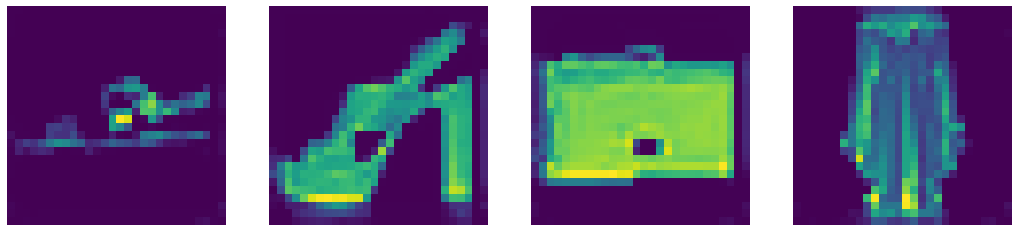

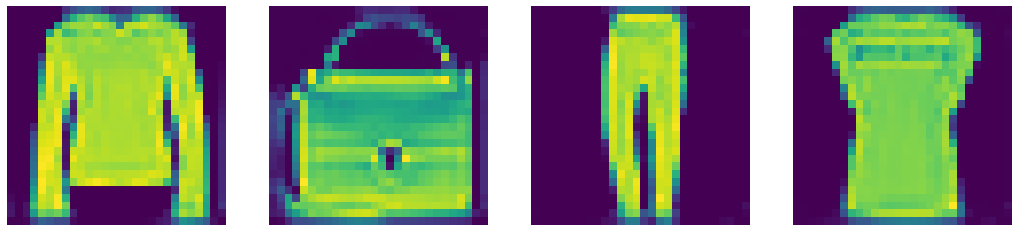

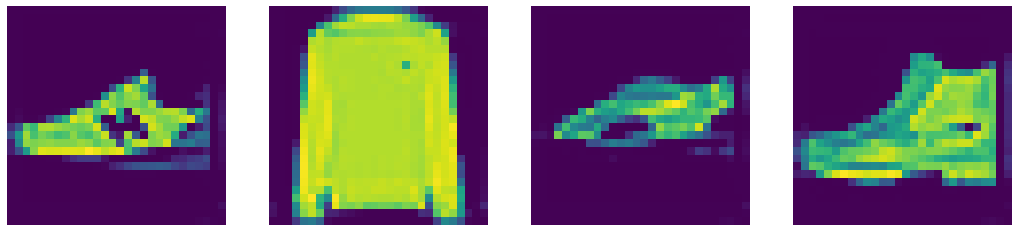

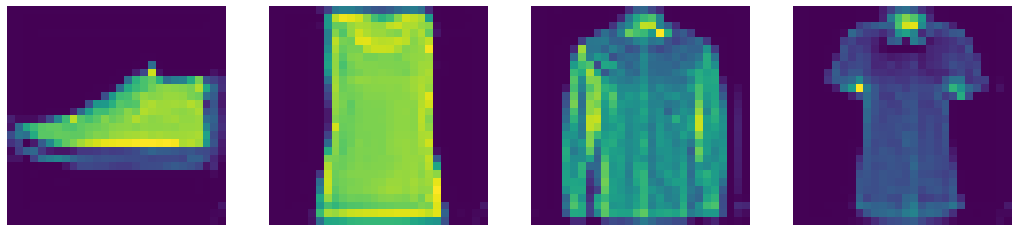

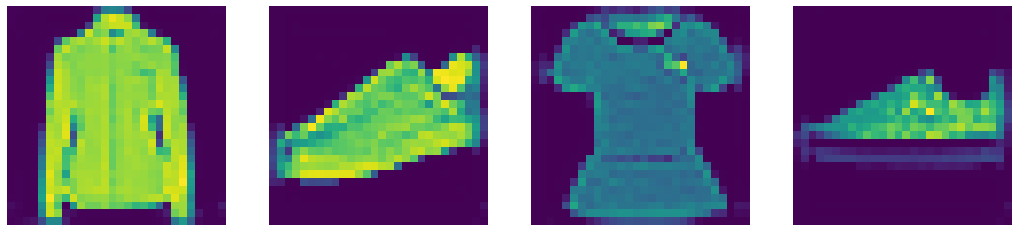

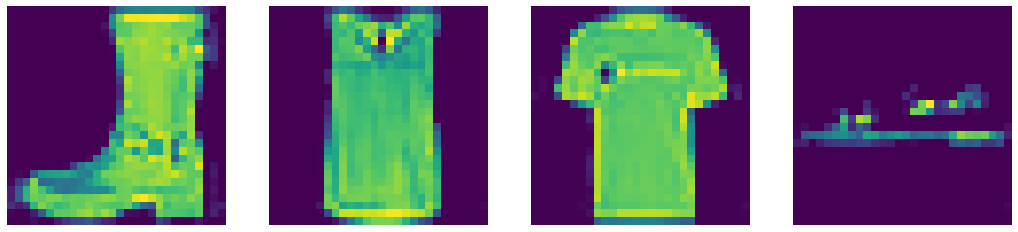

In [20]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        output = model_1(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

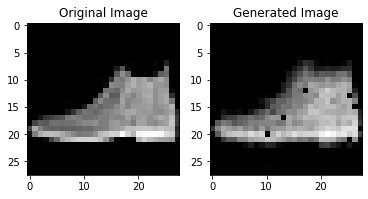

In [22]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

## Exercise 3
### Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder


The performance of CNN_Autoencoder is that the error is very small (loss) compared to the fully connected and  also the images generated are clear than the one generated using the fully connected. 

## Exercise 2
### Edit the code above for denoising autoencoder? (bonus point if your code it)


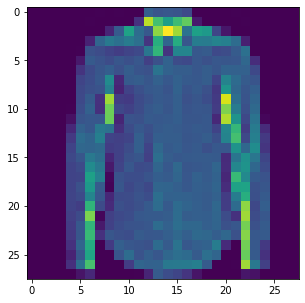

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img)

In [26]:
## Training

# number of epochs 
n_epochs = 10

# for adding noise to images
noise_factor=0.5
for epoch in range( 1,n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    for data in trainloader:
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        optimizer.zero_grad()
        outputs = model_1(noisy_imgs)
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(trainloader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch,train_loss))

Epoch: 1 	Training Loss: 31.637268
Epoch: 2 	Training Loss: 22.512466
Epoch: 3 	Training Loss: 21.753392
Epoch: 4 	Training Loss: 21.380469
Epoch: 5 	Training Loss: 21.195118
Epoch: 6 	Training Loss: 20.999922
Epoch: 7 	Training Loss: 20.834680
Epoch: 8 	Training Loss: 20.716459
Epoch: 9 	Training Loss: 20.594179
Epoch: 10 	Training Loss: 20.403902


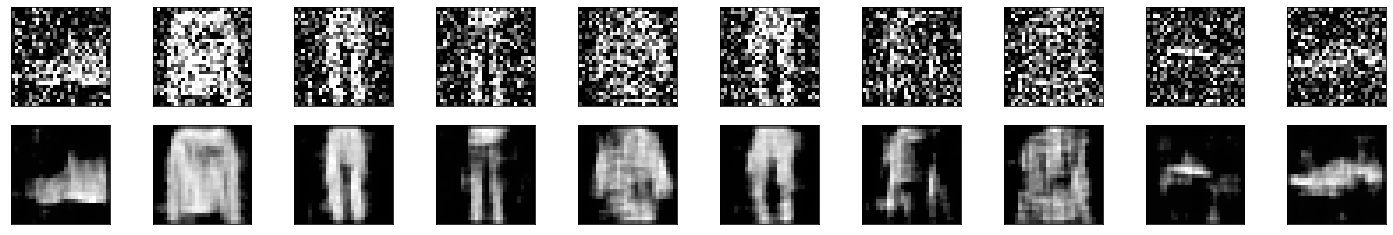

In [28]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = images + noise_factor * torch.randn(*images.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

# get the outputs
output = model_1(noisy_imgs)
# display images
noisy_imgs = noisy_imgs.numpy()


output = output.view(bs, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for noisy_imgs, row in zip([noisy_imgs, output], axes):
    for img, ax in zip(noisy_imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [0]:
check_archi = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3),
                                    nn. LeakyReLU(),
                            
                                    nn.Conv2d(16, 8, kernel_size=3),
                                    nn.LeakyReLU())
                    

In [30]:
check_archi(torch.rand(1,1, 28,28)).shape

torch.Size([1, 8, 24, 24])

## Variational Autoencoder (VAE)

Trying  to generate new objects using VAE.

In [0]:
# Loaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(traindataset, batch_size= batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testdataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [0]:
import torch.nn as nn
import torch.nn.functional as F
class VAE(nn.Module):
    def __init__(self, z_size = 10, eps = 0.001):
        super(VAE, self).__init__()
        self.z_size = z_size
        self.eps = eps
        self.encoder = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3 ),
                                    nn.ReLU(),
                                    
                                    nn.Conv2d(16, 8, kernel_size=3),
                                    nn.ReLU())
        self.mu = nn.Linear(24*24*8, z_size)
        self.var = nn.Linear(24*24*8, z_size)
       
        self.decoder = nn.Sequential(nn.ConvTranspose2d(8, 16,  kernel_size = 3),
                                     nn.ReLU(),
                                     nn.ConvTranspose2d(16, 1, kernel_size= 3),
                                     nn.Sigmoid())
        self.Z = nn.Linear(z_size, 8*24*24)
                                     
    def reparametrization(self, mu, logsig):
      std = torch.exp(logsig*0.5)
      eps = torch.randn_like(std)
      return  mu + std*eps
    
        
    def forward(self, x):
        #print(x.shape)
        x = self.encoder(x)
        #print('x1', x.shape)
        x = x.view(100,-1)
        #print('x2', x.shape)
        mu = self.mu(x)
        #print('mu', mu.shape)
        var = self.var(x) 
        #print('var', var.shape)
        z = self.reparametrization(mu, var)
        #print('zo', z.shape)
        z= self.Z(z)
        #print('z1', z.shape)
        z = z.view(-1, 8, 24,24)
        #print('z', z.shape)
        #z = z.view(1000, 8, 1, 1)
        x_rec = self.decoder(z)
        
        
        return x_rec, mu, var

def loss_function(recon_x, x, mu, logvar, beta=3):
      BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
      KLD = -0.5 *torch.sum(1+ logvar - mu.pow(2) - logvar.exp())
      return BCE + beta*KLD


In [0]:

model_vae = VAE()
#model_vae

In [0]:
# Configure the optimiszer

learning_rate = 1e-4
optimizer = torch.optim.Adam(model_vae.parameters(), lr=learning_rate)

In [0]:
# !pip install ipdb
# import ipdb

epoch [1/10], loss:48.5065
epoch [2/10], loss:48.5258
epoch [3/10], loss:45.1174
epoch [4/10], loss:47.0009
epoch [5/10], loss:46.7242
epoch [6/10], loss:46.6530
epoch [7/10], loss:46.1621
epoch [8/10], loss:46.9828
epoch [9/10], loss:46.2715
epoch [10/10], loss:45.8221


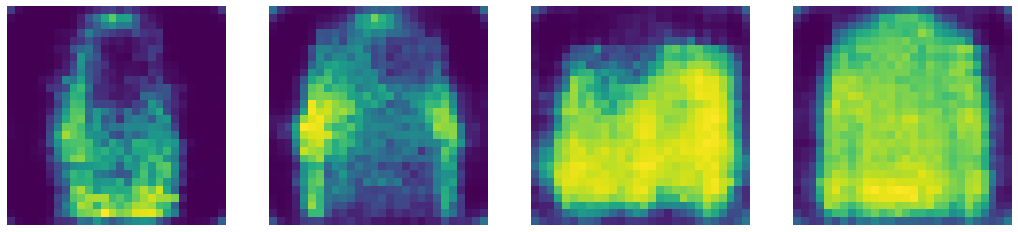

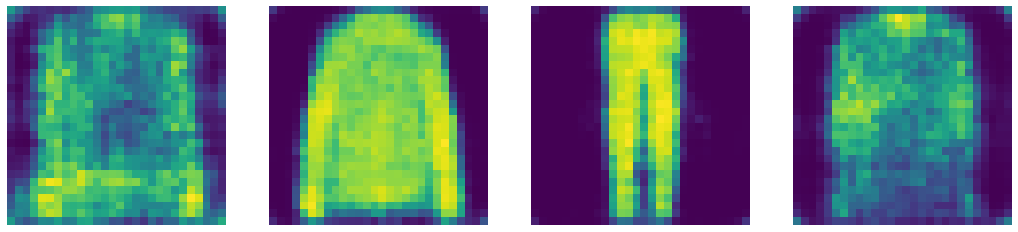

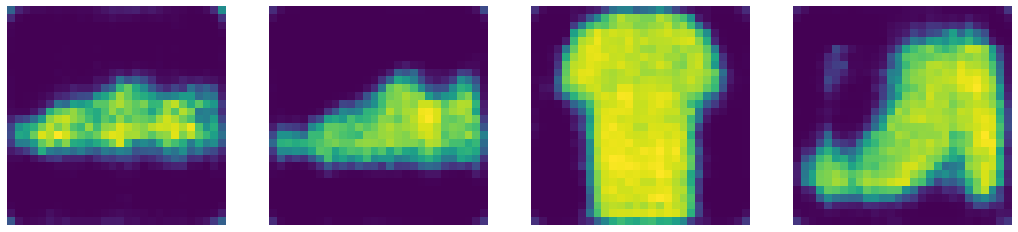

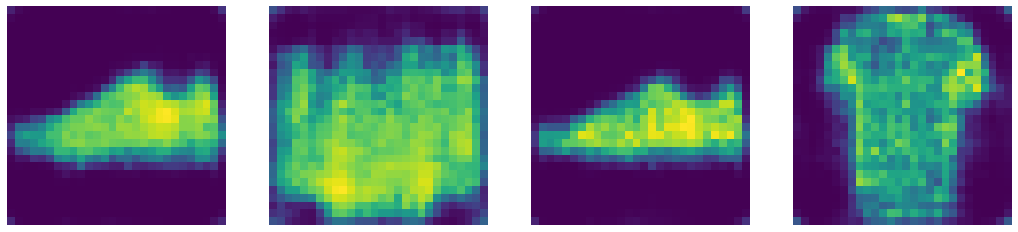

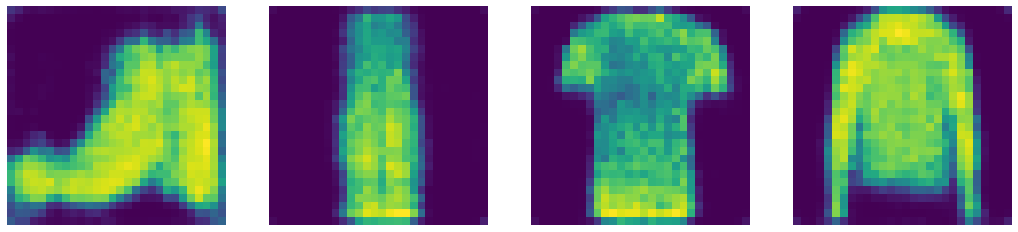

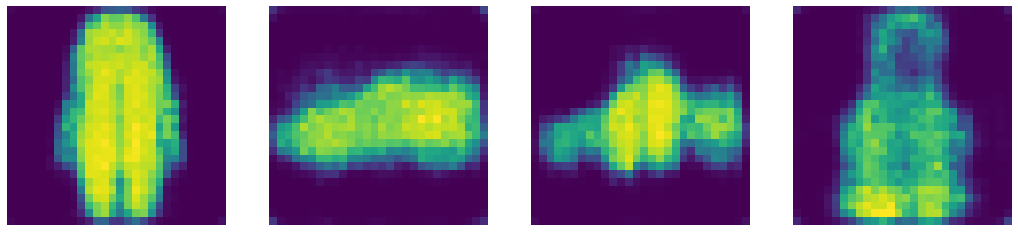

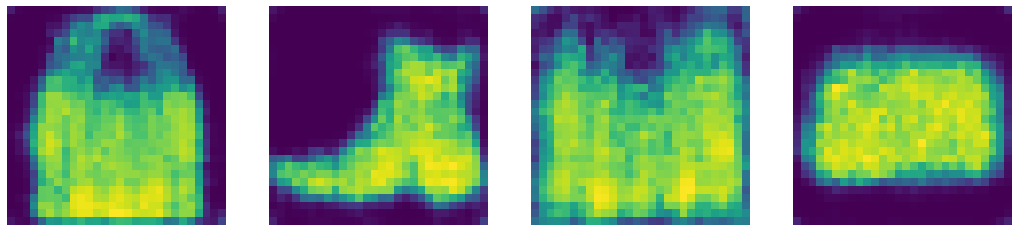

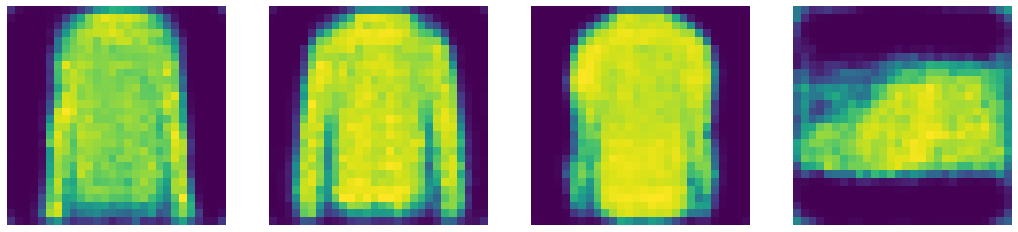

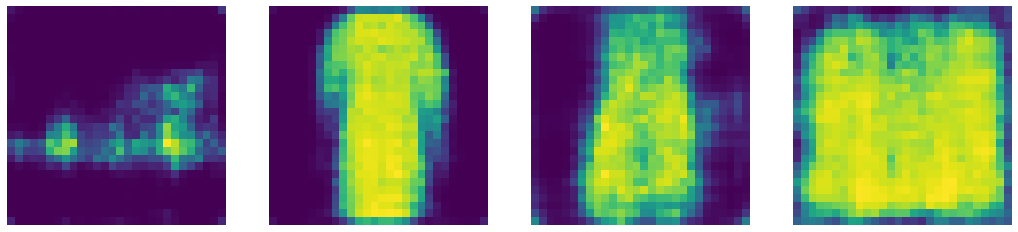

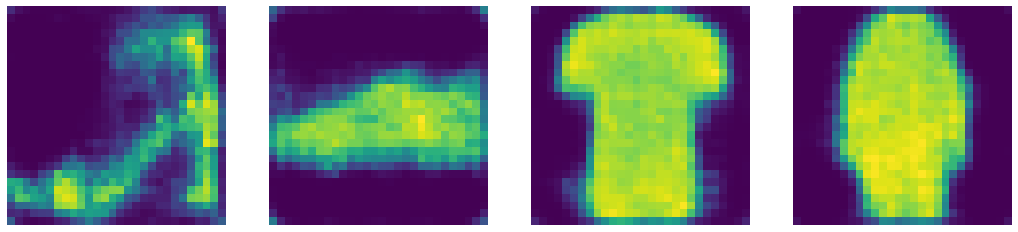

In [36]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
#         img.requires_grad_()
        output, mu, var = model_vae(img)
        #output = model_vae(img)  
        #ipdb.set_trace()
        loss = loss_function(output, img, mu,var)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item()/len(train_loader):.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

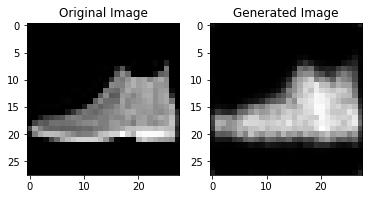

In [38]:
test_images, labels = next(iter(test_loader))

#test_images = Variable(test_images)#.view(test_images.size()[0], -1))
test_output, _,_ = model_vae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()